<a href="https://colab.research.google.com/github/yunjeong-chang/2021_MachineVision/blob/main/Hough_Transform%26Image_Stitching%26Harris_Corners%26FAST_Corners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hough_Transform

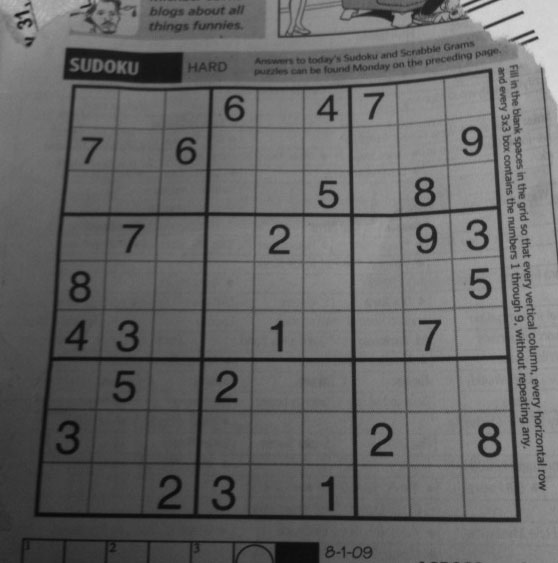

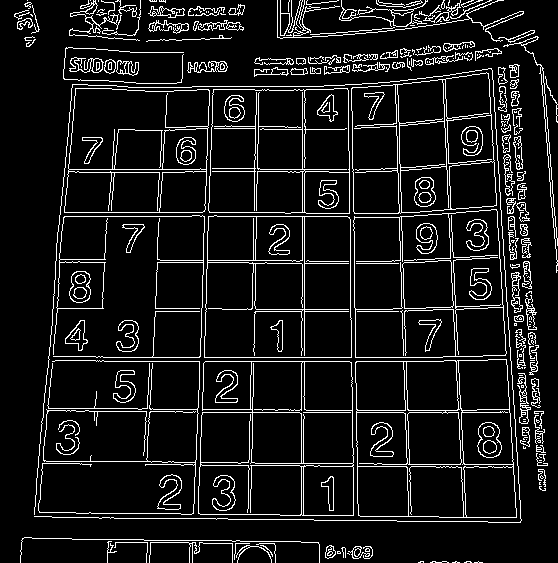

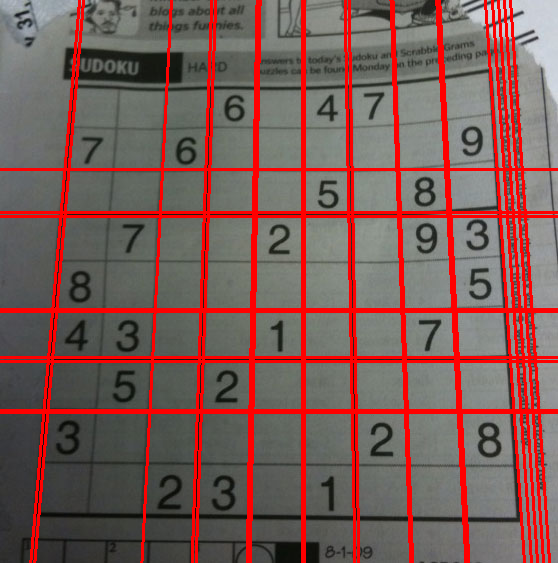

In [2]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv_imshow

img = cv.imread('/content/drive/MyDrive/MachineVision/samples/sudoku.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,50,150)
lines = cv.HoughLines(image=edges,rho=1,theta=np.pi/180,threshold=200)

for line in lines:
  rho,theta = line[0]
  cosine = np.cos(theta); sine = np.sin(theta)
  x0 = rho*cosine; y0 = rho*sine
  vec0 = [-sine,cosine]; vec1 = [sine,-cosine]
  x1 = int(x0 + 1000*vec0[0])
  y1 = int(y0 + 1000*vec0[1])
  x2 = int(x0 + 1000*vec1[0])
  y2 = int(y0 + 1000*vec1[1])
  cv.line(img,(x1,y1),(x2,y2),(0,0,255),2)
  
cv_imshow(gray)
cv_imshow(edges)
cv_imshow(img)

# Image_Stitching

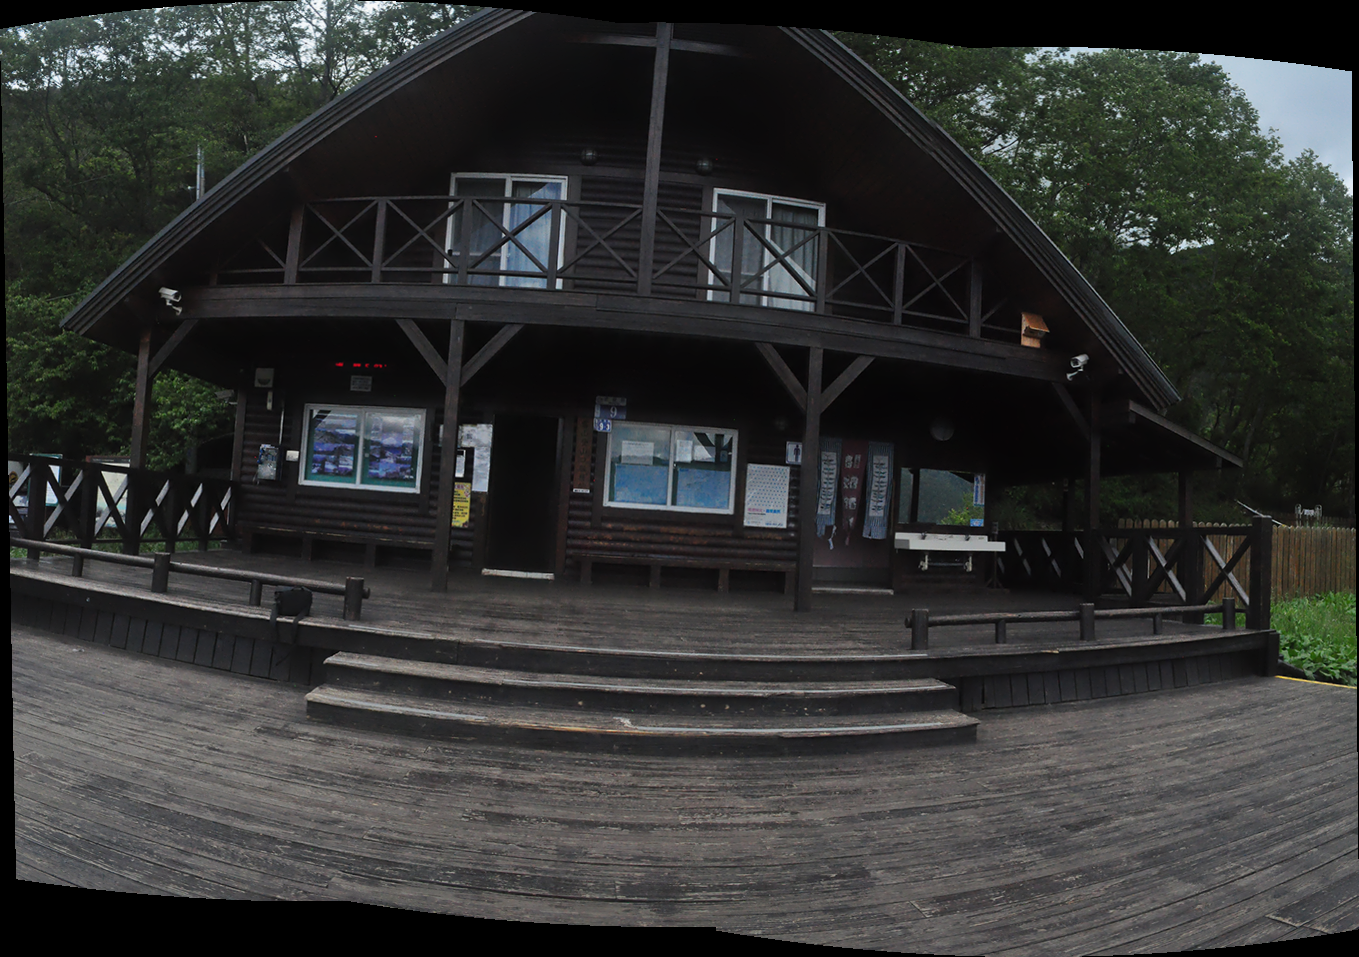

In [3]:
import cv2 as cv
from google.colab.patches import cv_imshow

imgs = []
img_names = ['DSC_0184.jpg', 'DSC_0185.jpg', 'DSC_0186.jpg']

for img_name in img_names:
  img = cv.imread('/content/drive/MyDrive/MachineVision/samples/'+img_name)
  imgs.append(img)

stitcher = cv.Stitcher.create(cv.Stitcher_PANORAMA)
status, pano = stitcher.stitch(imgs)

cv_imshow(pano)

# Harris_Corners

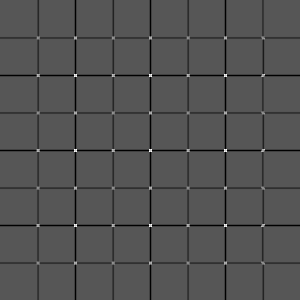

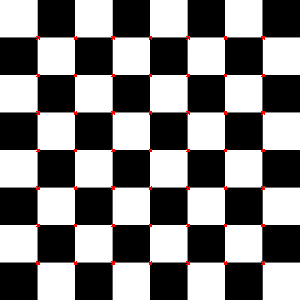

In [4]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv_imshow

img = cv.imread('/content/drive/MyDrive/MachineVision/samples/chessboard.png')
img = cv.resize(img,(300,300))
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

dst_ = cv.normalize(dst, None, 255, 0, cv.NORM_MINMAX, cv.CV_8UC1)
img[dst>0.01*dst.max()]=[0,0,255]

cv_imshow(dst_)
cv_imshow(img)

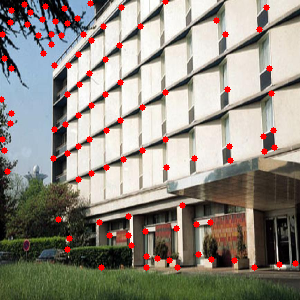

In [5]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv_imshow

img = cv.imread('/content/drive/MyDrive/MachineVision/samples/building.jpg')
img = cv.resize(img,(300,300))
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)

corners = cv.goodFeaturesToTrack(gray, maxCorners=100,
qualityLevel=0.1, minDistance=10)

for c in corners:
  x, y = c.ravel()
  cv.circle(img,(x,y),3,(0,0,255),-1)

cv_imshow(img)

# FAST_Corners

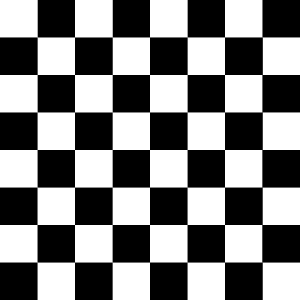

In [7]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv_imshow

img = cv.imread('/content/drive/MyDrive/MachineVision/samples/chessboard.png',0)
#img = cv.imread('/content/drive/MyDrive/MachineVision/samples/building.jpg',0)
img = cv.resize(img,(300,300))

# Initiate FAST object with default values
fast = cv.FastFeatureDetector_create(50)

# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv.drawKeypoints(img, kp, None, color=(255,0,0))

cv_imshow(img2)